# Exploration 5
# Find celebrities who look like me.


## |프로젝트: 나와 닮은 연예인 찾기
### |프로젝트 학습 과정
1. 사진 모으기
2. 얼굴 영역 자르기
3. 얼굴 영역의 임베딩 추출하기
- def get_face_embedding(face)
- def get_face_embedding_dict(dir_path)
4. 얼굴 임베딩 사이의 거리 측정(모은 연예인들과 비교하기)
5. 결과 확인
6. 다양한 재미있는 시각화 시도해보기

# 1. 사진 모으기
- 연예인 사진을 모아서 경로 '~/aiffel/face_imbedding/img' 폴더에 저장
- 이미지 중 얼굴만 crop해서 잘라주기
- 자른 이미지는 PIL Image(Image.fromarray)로 변환한 뒤에 저장하기

file_list counts: 2090
file_list: ['지아.jpg', '유민규.jpg', '오인혜.jpg', '차주영.jpg', '김병기.jpg']


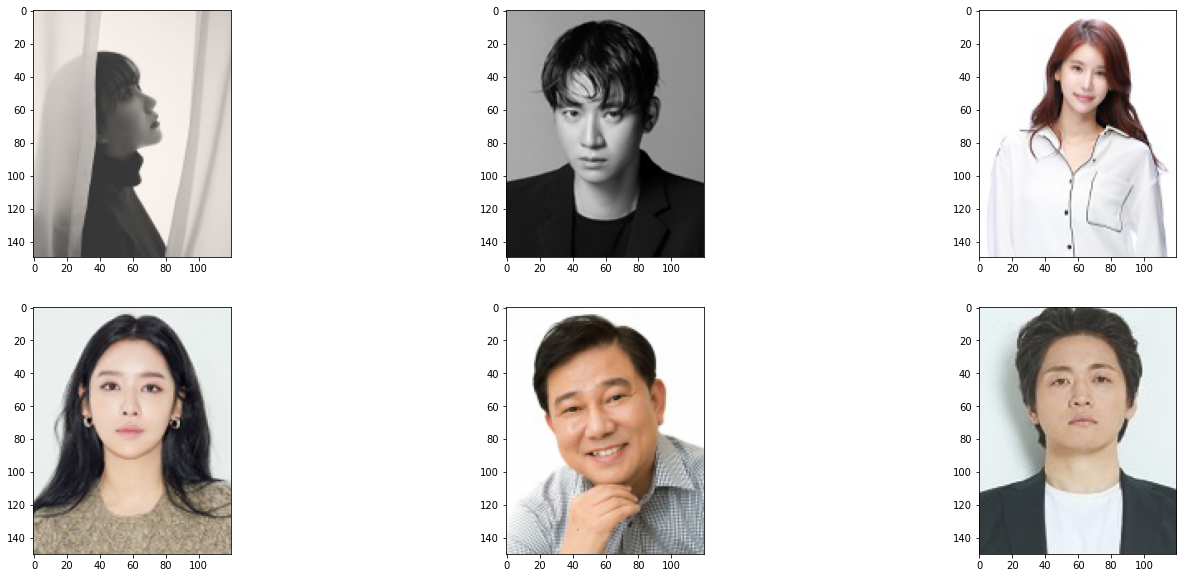

In [142]:
%matplotlib inline
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/img/'
file_list = os.listdir(dir_path)

print ("file_list counts: {}".format(len(file_list)))
print ("file_list: {}".format(file_list[:5]))

# 샘플 이미지 미리 보기
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    if i > 5:
        break
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)

plt.show()
fig.tight_layout()

# 2. 얼굴 영역 자르기

- 예시로 저랑 이름이 똑같은 '차수연' 이미지를 crop 해볼게요!🤭

[(118, 366, 304, 180)]


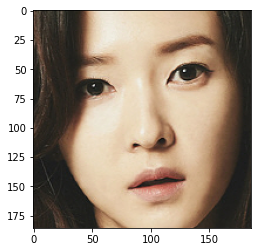

In [143]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/img/차수연.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

- 얼굴 영역을 잘라 저장해주는 'get_cropped_face(image_file)' 함수를 생성해봅시다!
- face_recognition.face_locations는 얼굴을 찾아줍니다.

In [144]:
def get_cropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if face_locations == []:
        return []
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

이번엔 함수가 잘 되었는지 제 이미지로 확인해 봅시다!

- 이름이 똑같은 연예인이 있어서 제 이미지는 '진짜차수연', '진짜차수연2'으로 저장해두었습니다.😆

[(118, 366, 304, 180)]


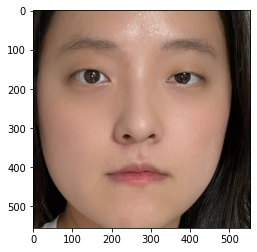

In [145]:
# 제 사진을 crop 시도해봅니다.

my_path = os.path.join(dir_path, '진짜차수연.jpg')

my_face = get_cropped_face(my_path)
print(face_locations)
plt.imshow(my_face)

- (솔직히 좀 피곤하긴 했습니다...)

[(118, 366, 304, 180)]


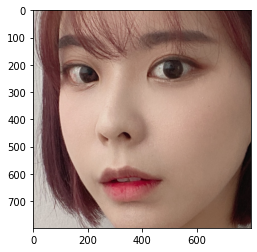

In [146]:
my_sister = os.path.join(dir_path, '차수빈.jpg')

my_sis = get_cropped_face(my_sister)
print(face_locations)
plt.imshow(my_sis)

- 언니와 닮았다고 나올지 궁금해서 사진을 한 장 달라고 했습니다! 가즈아~

# 3. 얼굴 영역의 임베딩 추출하기
- def get_face_embedding(face)
- def get_face_embedding_dict(dir_path)

## 1) 얼굴 임베딩 벡터를 구하는 함수
- def get_face_embedding(face)

In [148]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(my_face)  
embedding

[array([-0.08777208,  0.05697   ,  0.03992429, -0.10292044, -0.09995047,
        -0.07262765, -0.06450206, -0.12267142,  0.12384905, -0.19385034,
         0.15284841, -0.07126844, -0.21325096, -0.07377476, -0.06915116,
         0.24888395, -0.15156171, -0.15422601, -0.00874749,  0.01155018,
         0.09787329,  0.07851215, -0.019464  ,  0.07378186, -0.10708951,
        -0.30074456, -0.10479905, -0.05878446, -0.00709768, -0.00377285,
        -0.04970115,  0.06701142, -0.16304821,  0.00608017,  0.056661  ,
         0.12252156,  0.02895064, -0.04734081,  0.17118475,  0.08819868,
        -0.30825076,  0.06956246,  0.0619374 ,  0.25037512,  0.16897665,
         0.01139334,  0.03556337, -0.1596193 ,  0.16747166, -0.20746155,
         0.0207906 ,  0.09979151,  0.05695686,  0.018399  ,  0.03141266,
        -0.1416533 ,  0.092096  ,  0.08166953, -0.19672196,  0.03238367,
         0.13265136, -0.08129783, -0.03761601, -0.0322343 ,  0.19809514,
         0.04329087, -0.12843332, -0.22016388,  0.1

In [149]:
# 한 번 더 잘 임베딩 되는지 확인해 보겠습니다.

embedding = get_face_embedding(cropped_face)  
embedding

[array([-0.08462789,  0.09620072,  0.01825897, -0.07224959, -0.12530506,
        -0.04669834, -0.09467853, -0.14568326,  0.10014018, -0.17234467,
         0.17533416, -0.09788799, -0.22106998, -0.03876986, -0.03753022,
         0.25242177, -0.17203067, -0.16085809, -0.04593283, -0.00087958,
         0.04307693,  0.05376481, -0.04109439,  0.08872876, -0.02321022,
        -0.32293674, -0.08534414, -0.01840301, -0.03076187, -0.01634901,
        -0.08801316,  0.11751095, -0.141424  , -0.01418938,  0.05880436,
         0.11559444,  0.04947287, -0.04909536,  0.12461483,  0.01529684,
        -0.30665988,  0.10835351,  0.16911042,  0.25848684,  0.18803239,
         0.00277939, -0.02162724, -0.16235623,  0.12344281, -0.15781452,
         0.02244185,  0.11885977,  0.08346358,  0.04848497,  0.04852441,
        -0.15974629,  0.05158619,  0.06780452, -0.15841377, -0.00618987,
         0.15097579, -0.09198595, -0.00730537, -0.15198438,  0.19607374,
         0.08891033, -0.0731761 , -0.27792773,  0.0

In [150]:
embedding = get_face_embedding(my_sis)  
embedding

[array([-3.53020094e-02,  8.36655647e-02,  2.63253469e-02, -1.42236799e-01,
        -8.58245119e-02, -1.07740182e-02, -1.19356148e-01, -7.66901746e-02,
         1.16375387e-01, -1.81743801e-01,  2.04432309e-01, -1.52998328e-01,
        -2.64343262e-01, -2.77880928e-04, -8.67321789e-02,  2.11418763e-01,
        -1.29906192e-01, -1.81594416e-01, -4.01558727e-02,  5.26254512e-02,
         1.35102898e-01,  2.67875418e-02, -2.49168673e-03,  8.89486074e-02,
        -5.19967526e-02, -3.20319325e-01, -1.43175006e-01, -4.71841954e-02,
        -2.32566036e-02, -1.47593737e-01, -3.69812176e-02, -4.07782942e-03,
        -2.10069120e-01, -4.00930643e-04, -3.07694264e-03,  7.52376914e-02,
        -1.81452297e-02, -1.49322614e-01,  1.75263345e-01,  4.00954261e-02,
        -3.37037295e-01,  8.11041817e-02,  3.84783298e-02,  2.41925344e-01,
         1.36953637e-01,  2.07574926e-02, -2.01878361e-02, -1.78555861e-01,
         8.78690779e-02, -1.83382675e-01,  7.62932599e-02,  1.59542635e-01,
         7.4

In [151]:
len(embedding[0])

128

- 얼굴 임베딩 벡터의 차원수와 Face_recognition 패키지에서 제공하는 얼굴 임베딩 벡터의 차원수는 128차원으로 동일합니다.

## 2) 모든 이미지의 임베딩 딕셔너리 구하기
- img 디렉토리 안의 모든 이미지 파일 임베딩을 구해 dict 구조에 담아 리턴하는 함수
- 딕셔너리의 각 엘리먼트는 {사람 이름:임베딩벡터}
- 함수 이름은 get_face_embedding_dict(dir_path)

In [152]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    not_found_face = []
    
    for file in tqdm(file_list):
        
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            
            if len(embedding) > 0:  
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]

        except:
            not_found_face.append(file)

    return embedding_dict, not_found_face

embedding_dict, not_found_face = get_face_embedding_dict(dir_path)

print ("not found face: {} " .format(not_found_face[:10]))
print("얼굴을 찾지 못한 이미지 {}개".format(len(not_found_face)))

100%|██████████| 2090/2090 [07:22<00:00,  4.72it/s]

not found face: ['지아.jpg', '.ipynb_checkpoints', '이준.jpg', '심은경.jpg', '박정학.jpg', '최용준.jpg', '김윤석.jpg', '남궁민.jpg', '이광필.jpg', '강민경.jpg']
얼굴을 찾지 못한 이미지 108개


- Python에서 tqdm 라이브러리를 이용한 작업진행률 표시
- 자세한 설명👉 **[tqdm](https://github.com/tqdm/tqdm)**

얼굴을 찾지 못한 이미지는 총 **108**개이며, 예시로는 지아, 이준, 심은경... 등이 있네요! 그렇게 많지 않으니 참고차 108개를 모두 print 해보겠습니다.

In [153]:
print ("not found face: {}".format(not_found_face))

not found face: ['지아.jpg', '.ipynb_checkpoints', '이준.jpg', '심은경.jpg', '박정학.jpg', '최용준.jpg', '김윤석.jpg', '남궁민.jpg', '이광필.jpg', '강민경.jpg', '타블로.jpg', '강이채.jpg', 'SE7EN.jpg', '바비 킴.jpg', '류재현.jpg', '문지은.jpg', '소명.jpg', '투컷.jpg', '효연.jpg', '김성오.jpg', '한지안.jpg', 'img.zip', '이준오.jpg', '김규종.jpg', '헤이즈.jpg', '손가인.jpg', '하현우.jpg', '이주영.jpg', '정준영.jpg', '공유.jpg', '심희섭.jpg', '이일재.jpg', '김희애.jpg', '나미.jpg', '문명진.jpg', '손진영.jpg', '서태지.jpg', '서강준.jpg', '이희진.jpg', '유호린.jpg', '성준.jpg', '명계남.jpg', '오승윤.jpg', '주학년.jpg', '이은하.jpg', '길학미.jpg', '강균성.jpg', '남규리.jpg', '김우빈.jpg', '조현재.jpg', '정수라.jpg', '김영대.jpg', '진서연.jpg', '윤민수.jpg', '윤승아.jpg', '지이수.jpg', '김형중.jpg', '조권.jpg', '김종완.jpg', '이가희.jpg', '박효신.jpg', '한영애.jpg', '김윤아.jpg', '나윤권.jpg', '류진.jpg', '이민정.jpg', '김경록.jpg', '안효섭.jpg', '조용필.jpg', '선우선.jpg', '로이킴.jpg', '최락.jpg', '윤닭.jpg', '소찬휘.jpg', '배용준.jpg', '이종현.jpg', '강타.jpg', '제이홉.jpg', '타루.jpg', '휘성.jpg', '뉴.jpg', '우순실.jpg', '전진.jpg', '이선희.jpg', 'Zion.T.jpg', '노유민.jpg', '박재범.jpg', '구윤회.jpg', '허정민.jpg', '백청강.

# 4. 얼굴 임베딩 사이의 거리 측정
- 연예인 사진과 본인의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리(distance)를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다.
- get_nearest_face(name, top=5) 함수 이용!

일단 이미지를 Face Detection 모델로 미리 잘라두었습니다. 그리고 임베딩 벡터값을 넣어두었죠. 모델이 잘 구분하는지 학습을 통해 임베딩 간의 거리가 확보됐는지 확인해보도록 하겠습니다

In [154]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [155]:
get_distance('강동원', '고수')

0.5817290949438987

- 대한민국 대표 미남 '강동원'과 '고수'를 비교해보았습니다. 개인적으로 비슷한 인상이라 생각해서 거리를 조회해 보았는데 거리가 0.58 정도로 나오네요!

In [156]:
get_distance('고소영', '이영애')

0.5396709862619241

- 대한민국 대표 미녀 '고소영'과 '이영애'를 비교해보았습니다. 두 분은 많이 다르다고 판단을 하네요. 0.72가 나왔습니다!

In [157]:
get_distance('차수연', '진짜차수연')

0.42929149628584445

- 그리고 꼭 돌려보고 싶었던 연예인 차수연과 그냥(진짜)차수연의 거리입니다! 어머머, 0.42 밖에 나오지 않네요? 생각 외의 결과입니다🤭

In [159]:
get_distance('차수연', '차수빈')

0.5556848804063059

- 친언니와의 거리가 0.55만큼 나오네요. 고소영과 이영애를 비교했을 때보다 더 안 닮았다고 뜨네요...

In [160]:
# name1과 name2의 거리를 비교하는 함수를 생성
# name1은 미리 지정하고, name2는 호출시에 인자로 받기

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('진짜차수연')   

# sort_key_func는 sort_key_func('obama') 라고 호출할 때
# name 1과 name 2 사이의 임베딩 벡터 거리를 계산합니다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('진짜차수연',
  array([-0.08777208,  0.05697   ,  0.03992429, -0.10292044, -0.09995047,
         -0.07262765, -0.06450206, -0.12267142,  0.12384905, -0.19385034,
          0.15284841, -0.07126844, -0.21325096, -0.07377476, -0.06915116,
          0.24888395, -0.15156171, -0.15422601, -0.00874749,  0.01155018,
          0.09787329,  0.07851215, -0.019464  ,  0.07378186, -0.10708951,
         -0.30074456, -0.10479905, -0.05878446, -0.00709768, -0.00377285,
         -0.04970115,  0.06701142, -0.16304821,  0.00608017,  0.056661  ,
          0.12252156,  0.02895064, -0.04734081,  0.17118475,  0.08819868,
         -0.30825076,  0.06956246,  0.0619374 ,  0.25037512,  0.16897665,
          0.01139334,  0.03556337, -0.1596193 ,  0.16747166, -0.20746155,
          0.0207906 ,  0.09979151,  0.05695686,  0.018399  ,  0.03141266,
         -0.1416533 ,  0.092096  ,  0.08166953, -0.19672196,  0.03238367,
          0.13265136, -0.08129783, -0.03761601, -0.0322343 ,  0.19809514,
          0.04329087, -0.12

In [162]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   
            continue
        # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
        elif sorted_faces[i][0].startswith('진짜차수연'):   
            continue 
        # 하나의 다른 이미지가 또 출력되므로 본인 이미지 또한 제외
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [163]:
# 저와 가장 닮은 사람은 누굴까요?
nearest_me = get_nearest_face('진짜차수연')
nearest_me

순위 1 : 이름(최예빈), 거리(0.36365641053201814)
순위 2 : 이름(연우), 거리(0.38089730477768396)
순위 3 : 이름(신은수), 거리(0.38790816152416846)
순위 4 : 이름(김인이), 거리(0.3899690930893757)
순위 5 : 이름(이현주), 거리(0.3906966773006036)


In [164]:
# 저와 가장 닮은 사람은 누굴까요?
nearest_me2 = get_nearest_face('진짜차수연2')
nearest_me2

순위 1 : 이름(최예빈), 거리(0.3531319847900596)
순위 2 : 이름(연우), 거리(0.37409824835249467)
순위 3 : 이름(박규영), 거리(0.3929261770742972)
순위 4 : 이름(이현주), 거리(0.39407333660186844)
순위 5 : 이름(홍동영), 거리(0.3955932927722376)


In [166]:
my_sister = get_nearest_face('차수빈')

순위 0 : 이름(경수진), 거리(0.33663106473832743)
순위 1 : 이름(강두리), 거리(0.3677321787066357)
순위 2 : 이름(유서진), 거리(0.3858199570646458)
순위 3 : 이름(배윤경), 거리(0.3886077143034404)
순위 4 : 이름(유인영), 거리(0.3899483537100305)
순위 5 : 이름(윤보라), 거리(0.4016527377486985)


# 5. 결과 확인

#### 1. 진짜차수연의 경우, 가장 닮은 사람은?

|순위|이름|거리|
|---|-----|-----|
|1|최예빈|0.36365641053201814|
|2|연우|0.38089730477768396|
|3|신은수|0.38790816152416846|
|4|김인이|0.3899690930893757|
|5|이현주|0.3906966773006036|

#### 2. 진짜차수연2의 경우, 가장 닮은 사람은?

|순위|이름|거리|
|---|-----|-----|
|1|최예빈|0.3531319847900596|
|2|연우|0.37409824835249467|
|3|박규영|0.3929261770742972|
|4|이현주|0.39407333660186844|
|5|홍동영|0.3955932927722376|

<br/>
<br/>
- 신기하게도 1, 2위까지는 동일한 인물이고, 3~5위에만 약간의 변동이 있네요
- 아까 친언니와의 거리는 0.58 정도인 것을 확인했을 때, 순위권의 훨씬 밖임을 알 수 있네요

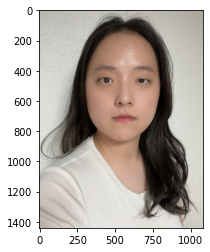

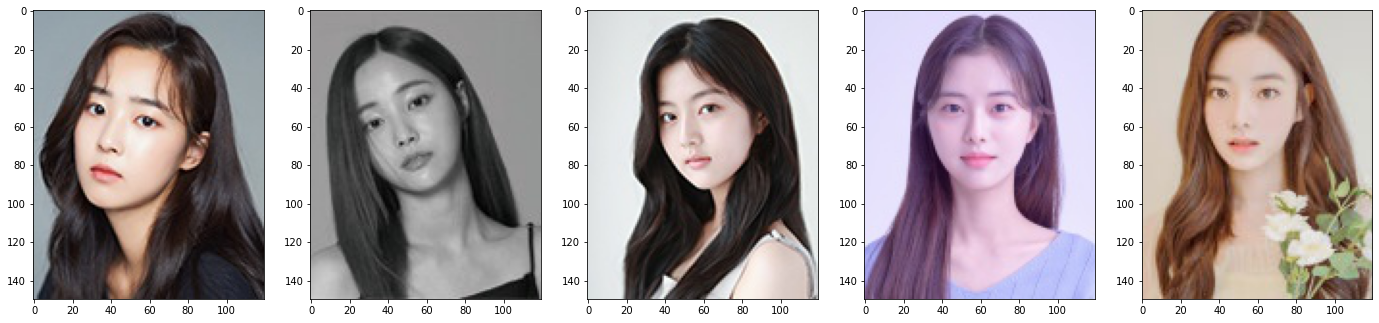

In [165]:
image = img.imread(dir_path+'진짜차수연.jpg')
plt.imshow(image)
nearest_me = ['최예빈', '연우', '신은수', '김인이', '이현주']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+nearest_me[i]+".jpg")
    ax.imshow(image)
    
plt.show()

fig.tight_layout()

- 닮은꼴 이미지 출력을 바로 할 수 있게끔 함수를 만들고 싶었는데, 계속된 실패로 😭 일단은 어쩔 수 없이 리스트를 만들어서 출력해보았습니다. 사진을 보니 전혀 닮지 않은 것 같네요.

# 6. 다양한 시각화 도전

- 다양한 시각화는 많은 자료를 찾아 보았는데, 아직 따라하기 좀 어려워서 pass해야 할 것 같습니다

# 7. 이번 프로젝트로 느낀 점

- 많은 시행 착오를 통해 아직 코딩 실력이 부족하다는 점을 많이 느꼈고, 머신러닝/딥러닝 이론 이해와 실습도 중요하지만 파이썬의 기초를 닦는데 더 집중해야 할 필요도 있음을 느꼈습니다.
- 재미있는 프로젝트를 통해 이번에도 즐겁게 하였고, 다음엔 CNN 모델을 이용해 더 심회적으로 실습해보고 싶습니다.

공부해볼 것

- FaceNet 논문 [다운로드](https://arxiv.org/abs/1503.03832)

열심히 돌아다니며 알게 된, FaceNet. 이번 Ex5 노드에 나오는 내용도 들어가 있고, 어렵겠지만 천천히 뜯어 보면 좋을 듯 하다!